In [26]:
import numpy as np
from prim import PRIM
import seaborn as sns
import sys
import pandas as pd

In [27]:
def generate_data(parameter_from_dataset, varied_parameter):
    
    if varied_parameter == 'size':
        num_features = 5
        data_size = parameter_from_dataset
    else:
        if varied_parameter == 'dimension':
            num_features = parameter_from_dataset
            data_size = 100
        else:
            return None
        
    # Define the covariance matrix, mean vectors, and dimensionality
    cov = np.eye(num_features)  # Identity matrix for covariance (change as needed)
    m1 = np.zeros(num_features)  # Mean vector for class 0 (change as needed)
    m2 = np.ones(num_features)  # Mean vector for class 1 (change as needed)
    
    # Generate synthetic data for the specified dimensionality
    x = np.vstack((np.random.multivariate_normal(m1, cov, data_size),
                   np.random.multivariate_normal(m2, cov, data_size)))
    
    y = np.hstack((np.zeros(data_size), np.ones(data_size))).astype(int)
    
    # Generating a large synthetic dataset for testing
    xtest = np.vstack((np.random.multivariate_normal(m1, cov, 100 * data_size),
                       np.random.multivariate_normal(m2, cov, 100 * data_size)))
    
    ytest = np.hstack((np.zeros(100 * data_size), np.ones(100 * data_size))).astype(int)
    
    return x, y, xtest, ytest


In [28]:
def calculate_score(x, y, xtest, ytest, model):
    model.fit(x, y)
    return model.calculate_accuracy(xtest, ytest)
    

In [29]:
def calculate_all_scores(number_of_datasets, dataset_parameters, model, varied_parameter):
    k = 0
    result=[]

    for i in range(number_of_datasets):
        for j in dataset_parameters:
            k = k + 1
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(number_of_datasets*len(dataset_parameters)))
            x, y, xtest, ytest = generate_data(j, varied_parameter)
            score = calculate_score(x, y, xtest, ytest, model)
            result.append(pd.DataFrame([[j, score]]))
            
    return result


In [30]:
def format_results(results, varied_parameter):
    results = pd.concat(results)
    results.columns = ('size', 'PRIM')
    tmpres1 = results[['size', 'PRIM']]
    tmpres1['method'] = pd.Series(['PRIM']).repeat(tmpres1.shape[0])
    tmpres1.columns = ('Data ' + varied_parameter, 'Score', 'method')
    results = tmpres1
    return results

In [31]:
def show_results(number_of_datasets, dataset_parameters, model, varied_parameter):
    results = calculate_all_scores(number_of_datasets, dataset_parameters, model, varied_parameter)
    results = format_results(results, varied_parameter)
    return sns.pointplot(x = 'Data ' + varied_parameter, y = 'Score', hue = 'method', data = results)
      

experiment 5400/5400

<Axes: xlabel='Data size', ylabel='Score'>

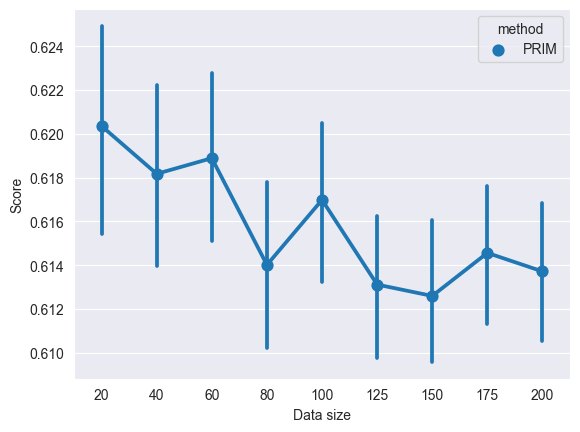

In [32]:
show_results(600, [20, 40, 60, 80, 100, 125, 150, 175, 200], PRIM(alpha=0.05), 'size')

experiment 700/700

<Axes: xlabel='Data dimension', ylabel='Score'>

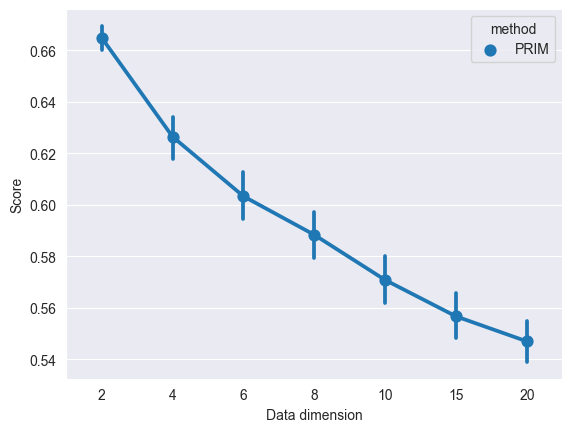

In [36]:
show_results(100, [2, 4, 6, 8, 10, 15, 20], PRIM(alpha=0.05), 'dimension')